<a href="https://colab.research.google.com/github/intencjusz/machine-learning/blob/main/unsupervised/01_clustering/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

Wygenerowanie danych

In [5]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 1000, centers = 4, cluster_std = 1.5, center_box = (-8.0, 8.0), random_state = 42)[0]

df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

Algorytm K-średnich

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [7]:

# wcss
kmeans.inertia_

3866.404472015416

In [8]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,3
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [9]:

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 5 klastrów',
           template='plotly_dark')


WCSS - Within-Cluster Sum-of-Squared

In [18]:


wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695978, 7734.886635126091, 4282.137026938605, 3887.2732996091922, 3460.167398685223, 3125.6988257194157, 2731.3900726660245, 2471.8058192739268]


In [19]:
wcss = pd.DataFrame(wcss, columns = ['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()


,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3887.273300
4,5,3460.167399


Metoda "łokcia" - Elbow Method

In [20]:

px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

Wizualizacja klastrów

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry',
           template='plotly_dark')

In [22]:

centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-5.302413,-5.404200
1,-4.678306,6.633539
2,3.630348,1.808377


In [23]:

fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500,
                 title='Algorytm K-średnich - 3 klastry', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}},
                         showlegend=False))
fig.show()

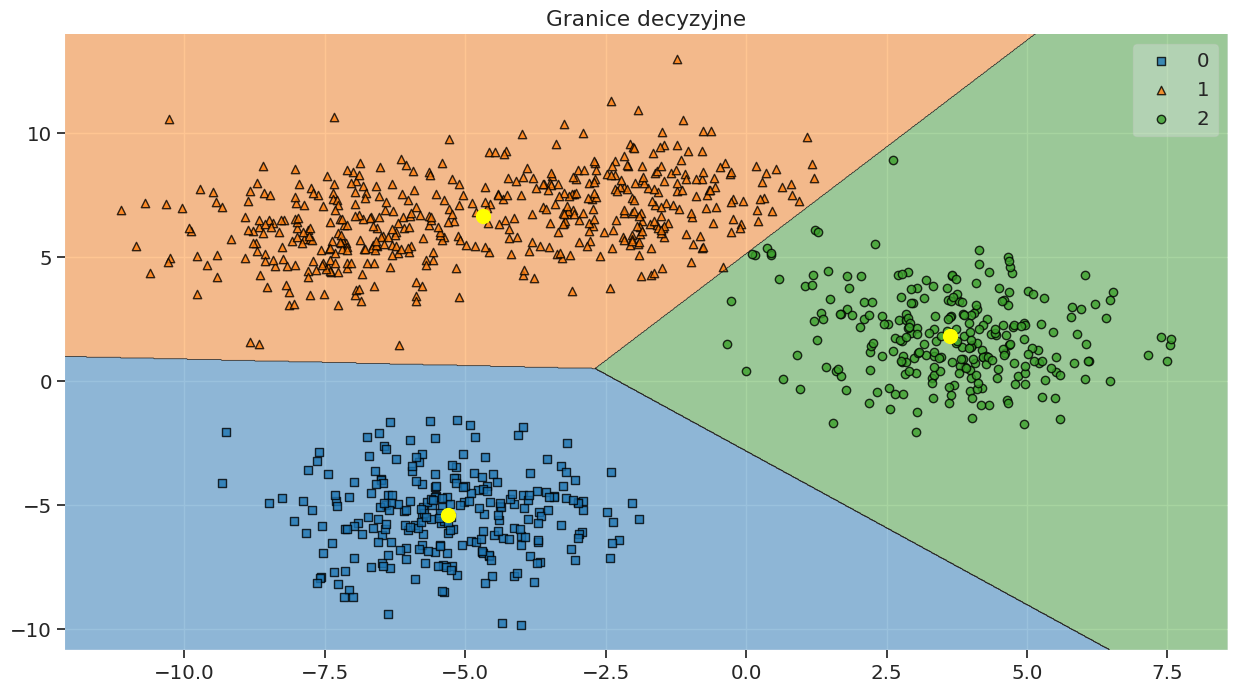

In [24]:


from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()